In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data_frame = pd.read_excel('maliciousornot.xlsx')
data_frame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [9]:
#data_frame.corr()['Type']

<AxesSubplot:xlabel='Type', ylabel='count'>

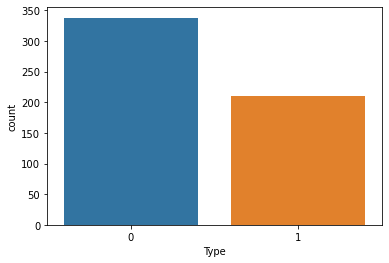

In [11]:
sns.countplot(x = 'Type',data=data_frame)

<AxesSubplot:>

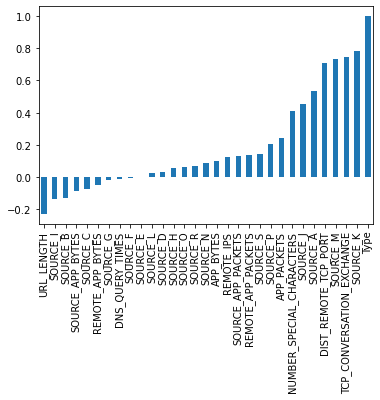

In [12]:
data_frame.corr()['Type'].sort_values().plot(kind='bar')

In [93]:
Y = data_frame['Type'].values
X = data_frame.drop('Type',axis=1).values

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=15)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

model.fit(x=X_train,y=Y_train,epochs=500,validation_data=(X_test,Y_test),verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 13ms/step - loss: 0.6856 - val_loss: 0.6870
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6597 - val_loss: 0.6676
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6333 - val_loss: 0.6508
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6015 - val_loss: 0.6336
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5715 - val_loss: 0.6173
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5365 - val_loss: 0.5868
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4983 - val_loss: 0.5573
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4610 - val_loss: 0.5419
Epoch 9/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4196 - val_loss: 0.4938
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.3841 - val_loss: 0.4708
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.2811
Epoch 84/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0609 - val_loss: 0.2783
Epoch 85/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0608 - val_loss: 0.2767
Epoch 86/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0561 - val_loss: 0.2860
Epoch 87/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0566 - val_loss: 0.2789
Epoch 88/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0551 - val_loss: 0.2746
Epoch 89/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0577 - val_loss: 0.2744
Epoch 90/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.2922
Epoch 91/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0553 - val_loss: 0.2801
Epoch 92/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0538 - val_loss: 0.2739
Epoch 93/500


12/12 [==============================] - 0s 4ms/step - loss: 0.0280 - val_loss: 0.2500
Epoch 165/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0268 - val_loss: 0.2495
Epoch 166/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0259 - val_loss: 0.2482
Epoch 167/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.2493
Epoch 168/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.2554
Epoch 169/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0255 - val_loss: 0.2524
Epoch 170/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.2556
Epoch 171/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0245 - val_loss: 0.2502
Epoch 172/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.2545
Epoch 173/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0236 - val_loss: 0.2548
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.3548
Epoch 246/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.3562
Epoch 247/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.3519
Epoch 248/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.3582
Epoch 249/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.3592
Epoch 250/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.3597
Epoch 251/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.3666
Epoch 252/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.3612
Epoch 253/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.3582
Epoch 254/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.3674
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.4881
Epoch 327/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.4923
Epoch 328/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.4856
Epoch 329/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.4928
Epoch 330/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.4984
Epoch 331/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.4919
Epoch 332/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.5002
Epoch 333/500
12/12 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.5020
Epoch 334/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.5018
Epoch 335/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.5107
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.6246
Epoch 408/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.6126
Epoch 409/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.6226
Epoch 410/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.6277
Epoch 411/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.6291
Epoch 412/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.6173
Epoch 413/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.6363
Epoch 414/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.6319
Epoch 415/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.6340
Epoch 416/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.6317
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 6.5456e-04 - val_loss: 0.7309
Epoch 488/500
12/12 [==============================] - 0s 4ms/step - loss: 6.5674e-04 - val_loss: 0.7339
Epoch 489/500
12/12 [==============================] - 0s 4ms/step - loss: 7.7444e-04 - val_loss: 0.7350
Epoch 490/500
12/12 [==============================] - 0s 4ms/step - loss: 7.1202e-04 - val_loss: 0.7358
Epoch 491/500
12/12 [==============================] - 0s 4ms/step - loss: 7.0072e-04 - val_loss: 0.7344
Epoch 492/500
12/12 [==============================] - 0s 4ms/step - loss: 6.3519e-04 - val_loss: 0.7357
Epoch 493/500
12/12 [==============================] - 0s 4ms/step - loss: 6.7292e-04 - val_loss: 0.7349
Epoch 494/500
12/12 [==============================] - 0s 4ms/step - loss: 6.2861e-04 - val_loss: 0.7421
Epoch 495/500
12/12 [==============================] - 0s 4ms/step - loss: 5.8266e-04 - val_loss: 0.7356
Epoch 496/500
12/12 [==============================] - 0s 4ms/step - 

<AxesSubplot:>

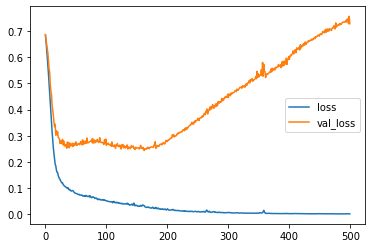

In [108]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [109]:
## after adding early stop
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [110]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [111]:
model.fit(x=X_train,y=Y_train,epochs=500,validation_data=(X_test,Y_test),verbose=1,callbacks=[early_stop])

Epoch 1/500
12/12 [==============================] - 1s 15ms/step - loss: 0.6574 - val_loss: 0.6446
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6273 - val_loss: 0.6178
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5975 - val_loss: 0.5897
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5644 - val_loss: 0.5641
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5260 - val_loss: 0.5316
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4851 - val_loss: 0.5098
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4421 - val_loss: 0.4656
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 0.3964 - val_loss: 0.4492
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.3501 - val_loss: 0.4354
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2988 - val_loss: 0.4193
Epoch 11

<AxesSubplot:>

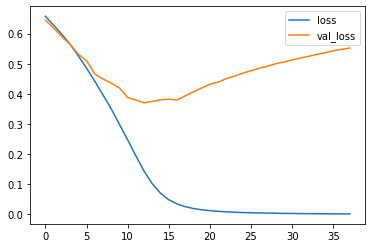

In [112]:
loss_stop_df = pd.DataFrame(model.history.history)
loss_stop_df.plot()

In [113]:
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [114]:
model.fit(x=X_train,y=Y_train,epochs=500,validation_data=(X_test,Y_test),verbose=1,callbacks=[early_stop])

Epoch 1/500
12/12 [==============================] - 1s 18ms/step - loss: 0.6091 - val_loss: 0.6230
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5904 - val_loss: 0.5975
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5844 - val_loss: 0.5751
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5476 - val_loss: 0.5618
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5362 - val_loss: 0.5373
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5018 - val_loss: 0.5061
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5048 - val_loss: 0.4989
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4793 - val_loss: 0.4766
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4490 - val_loss: 0.4660
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4367 - val_loss: 0.4584
Epoch 11

<AxesSubplot:>

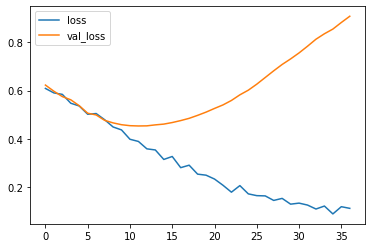

In [115]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [116]:
predicts_ = model.predict(X_train)
predicts_

array([[0.03621089],
       [0.9999944 ],
       [0.03621089],
       [0.9999944 ],
       [0.03621089],
       [0.03621089],
       [0.9999944 ],
       [0.03621089],
       [0.9999944 ],
       [0.9999944 ],
       [0.03621089],
       [0.03621089],
       [0.9999944 ],
       [0.03621089],
       [0.9999944 ],
       [0.03621089],
       [0.03621089],
       [0.9999944 ],
       [0.9999944 ],
       [0.9999944 ],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.9999944 ],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.9999944 ],
       [0.9999944 ],
       [0.9999944 ],
       [0.03621089],
       [0.03621089],
       [0.9999944 ],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.03621089],
       [0.9999944 ],
       [0.9999944 ],
       [0.03621089],
       [0.9999944 ],
       [0.9999944 ],
       [0.03621089],
       [0.036

In [122]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,predicts_))

ValueError: Found input variables with inconsistent numbers of samples: [165, 383]